In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

# Load the cytometry data (assumed to be in CSV format)
# Replace 'data.csv' with the actual data file path
data = pd.read_csv('/content/drive/MyDrive/data.csv')

In [ ]:
print(data.columns)

Index(['Time', 'Cell_length', 'DNA1', 'DNA2', 'CD45RA', 'CD133', 'CD19',
       'CD22', 'CD11b', 'CD4', 'CD8', 'CD34', 'Flt3', 'CD20', 'CXCR4',
       'CD235ab', 'CD45', 'CD123', 'CD321', 'CD14', 'CD33', 'CD47', 'CD11c',
       'CD7', 'CD15', 'CD16', 'CD44', 'CD38', 'CD13', 'CD3', 'CD61', 'CD117',
       'CD49d', 'HLA-DR', 'CD64', 'CD41', 'Viability', 'file_number',
       'event_number', 'label', 'individual'],
      dtype='object')


In [ ]:
# Display the first few rows of the dataset
print(data.head())

     Time  Cell_length        DNA1        DNA2    CD45RA     CD133      CD19  \
0  2693.0           22  201.783295  253.016647  0.817049 -0.147947 -0.033482   
1  3736.0           35  191.828598  308.869080  3.801385 -0.191446 -0.083274   
2  7015.0           32  116.111923  200.839218  3.204439 -0.161106  0.369613   
3  7099.0           29  176.248505  313.022461  2.237382 -0.138071 -0.088311   
4  7700.0           25  133.332779  226.467758 -0.044047 -0.151509  0.402548   

       CD22     CD11b       CD4  ...     CD117      CD49d     HLA-DR  \
0  0.332183 -0.045922  1.858334  ...  0.265375   4.804858  12.734092   
1  0.372388  4.494379 -0.177158  ...  0.448901   0.995556   2.558165   
2 -0.214952 -0.009404 -0.043904  ...  0.231194  33.025459   8.574364   
3 -0.220430  4.006598 -0.095335  ...  0.332596   8.879428   0.704930   
4  2.581769  6.742060  2.906627  ... -0.031117   0.909562   0.993077   

       CD64      CD41  Viability  file_number  event_number  label  individual  
0 -0.

In [ ]:
# Display the structure and data types of the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265627 entries, 0 to 265626
Data columns (total 41 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Time          265627 non-null  float64
 1   Cell_length   265627 non-null  int64  
 2   DNA1          265627 non-null  float64
 3   DNA2          265627 non-null  float64
 4   CD45RA        265627 non-null  float64
 5   CD133         265627 non-null  float64
 6   CD19          265627 non-null  float64
 7   CD22          265627 non-null  float64
 8   CD11b         265627 non-null  float64
 9   CD4           265627 non-null  float64
 10  CD8           265627 non-null  float64
 11  CD34          265627 non-null  float64
 12  Flt3          265627 non-null  float64
 13  CD20          265627 non-null  float64
 14  CXCR4         265627 non-null  float64
 15  CD235ab       265627 non-null  float64
 16  CD45          265627 non-null  float64
 17  CD123         265627 non-null  float64
 18  CD32

In [ ]:
# Get summary statistics of numerical columns
print(data.describe())

                Time    Cell_length           DNA1           DNA2  \
count  265627.000000  265627.000000  265627.000000  265627.000000   
mean   272948.344831      34.450572     641.595743     933.466175   
std    171220.139145      11.446694     865.915665    1140.667186   
min         1.000000      10.000000      40.405746      23.133020   
25%    120196.000000      26.000000     101.058731     205.195770   
50%    253276.000000      33.000000     139.504501     274.409729   
75%    424502.500000      41.000000    1435.977539    2170.162109   
max    709122.437500      65.000000    2745.666504    4396.652344   

              CD45RA          CD133           CD19           CD22  \
count  265627.000000  265627.000000  265627.000000  265627.000000   
mean        4.931193       0.793498       5.271011       4.163378   
std        11.441369       1.959306      12.016138      12.033168   
min        -0.286683      -0.290567      -0.290608      -0.286868   
25%         1.030280      -0.1146

In [ ]:
missing_labels = data['label'].isnull().sum()
total_rows = len(data)
labeled_rows = total_rows - missing_labels

In [ ]:
if missing_labels > 0 and labeled_rows > 0:
  print("the dataset is semi_supervised.")
  print(f"total rows:{total_rows}")
  print(f" labeled rows:{labeled_rows}")
  print(f"unlabeled rows: {missing_labels}")
else:
  print("the dataset is not semi-supervised.")

the dataset is semi_supervised.
total rows:265627
 labeled rows:104184
unlabeled rows: 161443


In [ ]:
data['Viability']

,Viability
0,3.474168
1,2.956692
2,3.443209
3,-0.132632
4,1.435457
...,...
265622,1.195905
265623,-0.017502
265624,0.537059
265625,3.307683


In [ ]:
null_counts = data.isnull().sum()
non_null_counts = data.notnull().sum()

In [ ]:
plot_data = pd.DataFrame({
    'Null Values': null_counts,
    'Non-Null Values' : non_null_counts
})

In [ ]:
#calculate label and unlabel percentage
label_count = data['label'].count()
unlabel_count = data['label'].isna().sum()

label_percentage = (label_count / len(data)) * 100
unlabel_percentage = (unlabel_count / len(data)) * 100

print(f"Label percentage: {label_percentage:.2f}%")
print(f"Unlabel percentage: {unlabel_percentage:.2f}%")

Label percentage: 39.22%
Unlabel percentage: 60.78%


In [ ]:
data=data.drop(columns=['Time', 'file_number', 'event_number'])

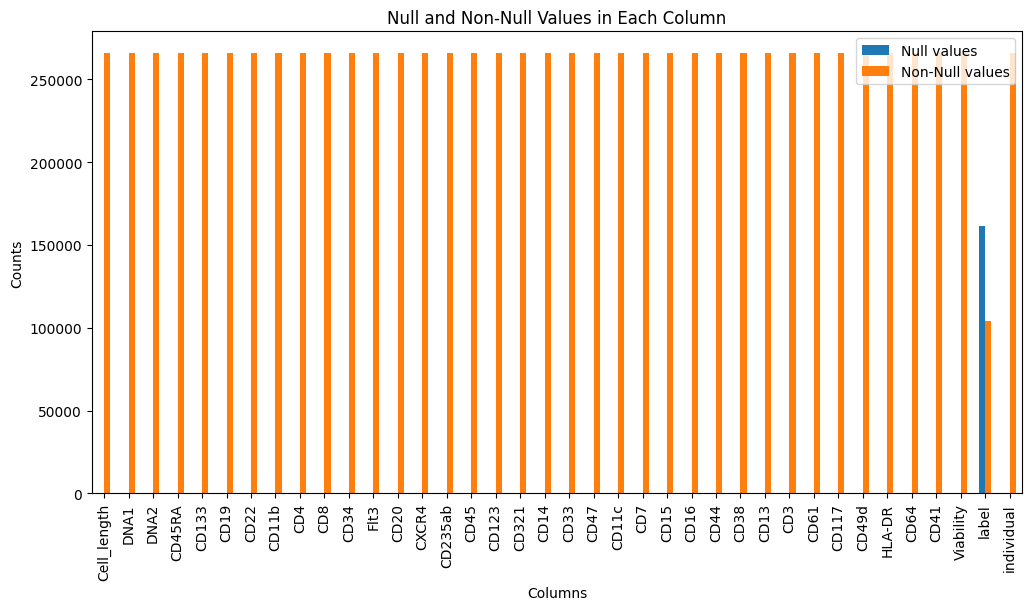

In [ ]:
# Plot comparision of null values vs non-null values
null_counts=data.isnull().sum()
non_null_counts=data.notnull().sum()
plot_data=pd.DataFrame({"Null values": null_counts,
                        "Non-Null values": non_null_counts
                        })
plot_data.plot(kind="bar", figsize=(12, 6))
plt.title("Null and Non-Null Values in Each Column")
plt.xlabel("Columns")
plt.ylabel("Counts")
plt.xticks(rotation=90)
plt.legend(loc="upper right")
plt.show()


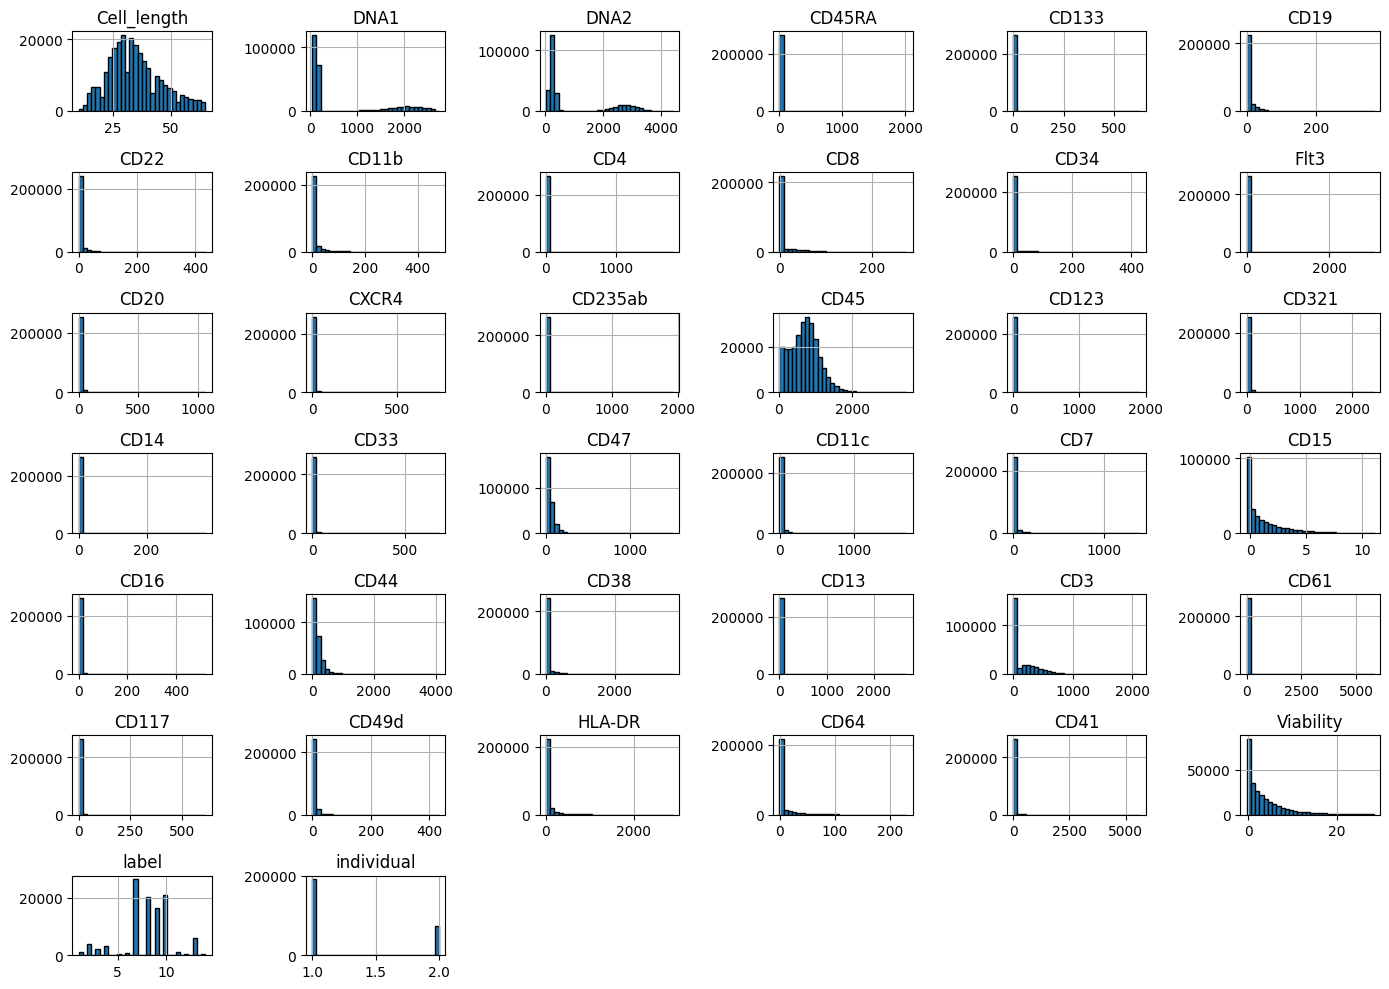

In [ ]:
# Plot histograms for all numerical columns
data.hist(figsize=(14, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

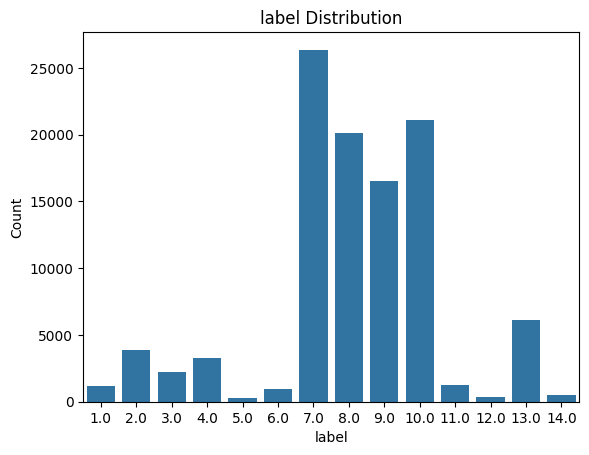

In [ ]:
# Countplot for another column in the dataset
sns.countplot(data=data, x='label')
plt.title('label Distribution')
plt.xlabel('label')
plt.ylabel('Count')
plt.show()

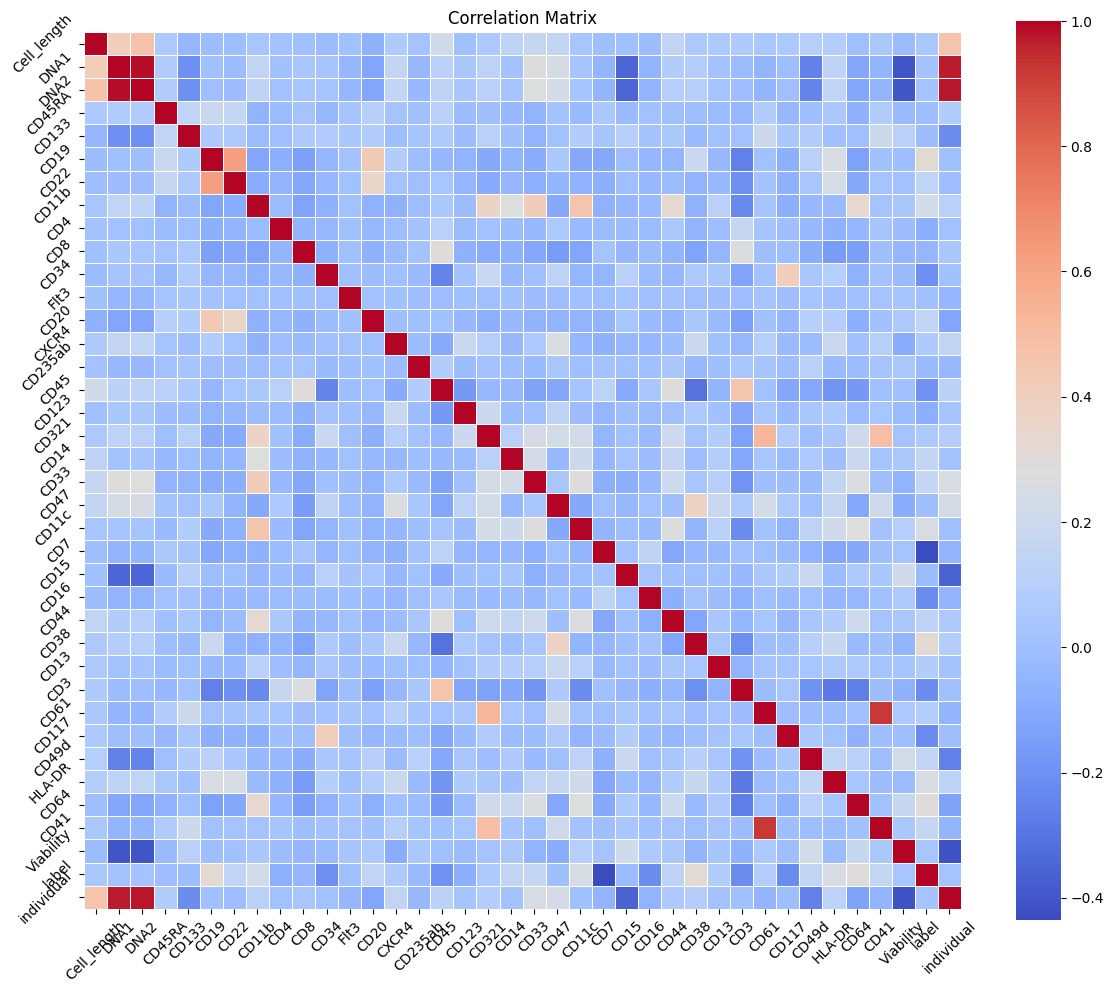

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()
# Create a heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#range of each feature in data set
for column in data.columns:
  feature_range = data[column].max() - data[column].min()
  print(f"Range of {column}: {feature_range}")

Range of Cell_length: 55
Range of DNA1: 2705.260757446289
Range of DNA2: 4373.519323348999
Range of CD45RA: 2013.4970097541834
Range of CD133: 629.0630275011063
Range of CD19: 367.64589342474915
Range of CD22: 435.891390711069
Range of CD11b: 481.8620219230657
Range of CD4: 1804.810034424064
Range of CD8: 273.4073664546013
Range of CD34: 430.49149709939906
Range of Flt3: 3083.149202555413
Range of CD20: 1062.0647517740726
Range of CXCR4: 744.96462726593
Range of CD235ab: 1925.8784293532397
Range of CD45: 3459.6277294158986
Range of CD123: 1914.2225522100975
Range of CD321: 2401.3572410941124
Range of CD14: 373.5840930938722
Range of CD33: 684.8300481736662
Range of CD47: 1508.6325097084045
Range of CD11c: 1698.3260714411736
Range of CD7: 1388.134843885896
Range of CD15: 11.344912439584778
Range of CD16: 520.675962328911
Range of CD44: 4108.539601758122
Range of CD38: 3675.5327078402042
Range of CD13: 2690.7746390104294
Range of CD3: 2131.9424919188073
Range of CD61: 5795.503212273121
R

(0.0, 6.0)

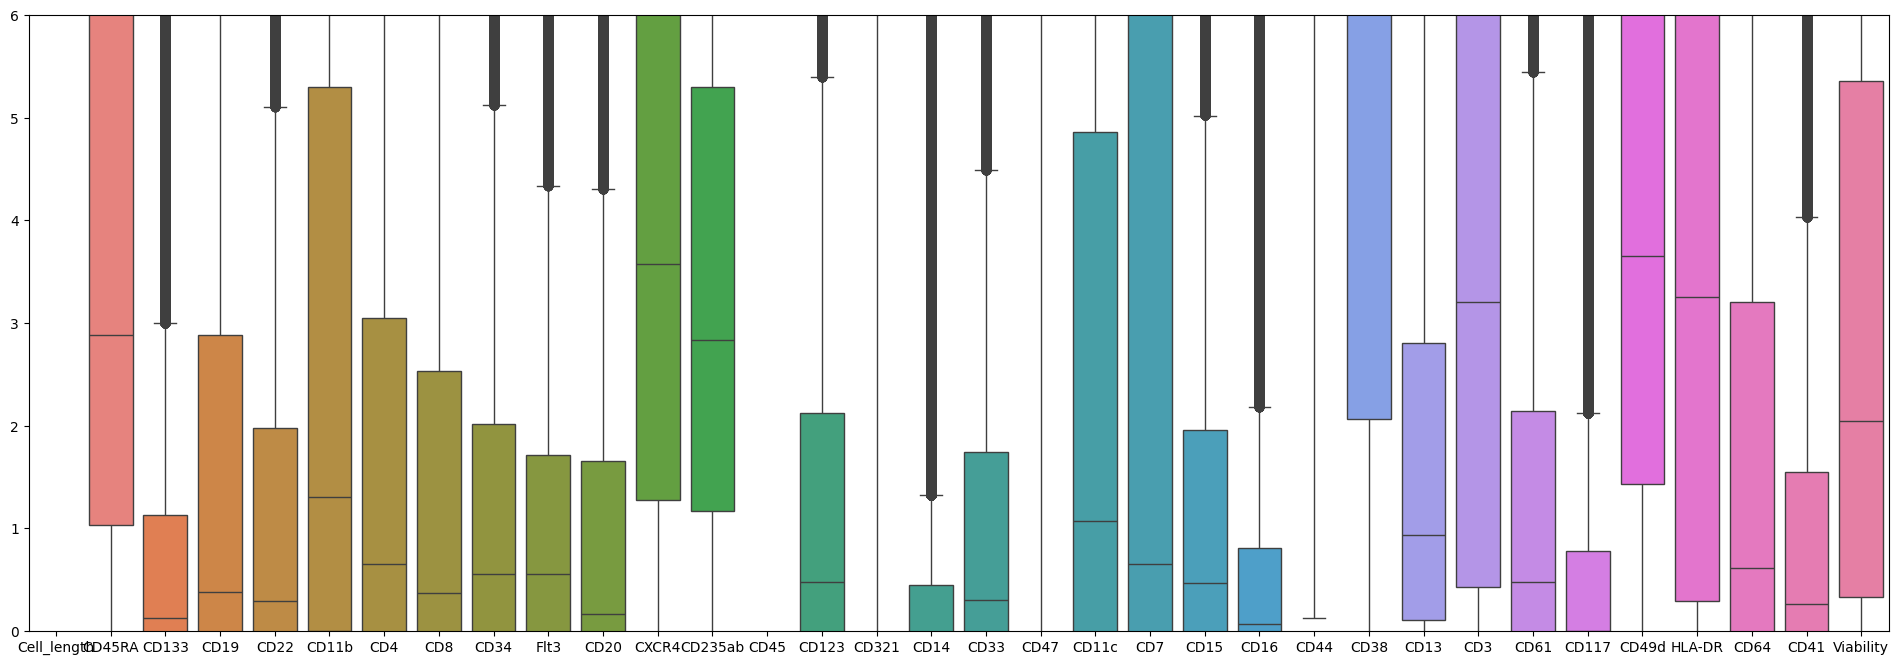

In [ ]:
#box plot
fig, ax = plt.subplots(figsize=(24, 8))
sns.boxplot(data=data[['Cell_length', 'CD45RA', 'CD133', 'CD19', 'CD22', 'CD11b', 'CD4', 'CD8', 'CD34', 'Flt3', 'CD20',
                   'CXCR4', 'CD235ab', 'CD45', 'CD123', 'CD321', 'CD14', 'CD33', 'CD47', 'CD11c',
                   'CD7', 'CD15', 'CD16', 'CD44', 'CD38', 'CD13', 'CD3', 'CD61', 'CD117', 'CD49d',
                   'HLA-DR', 'CD64', 'CD41', 'Viability']])
ax.set_ylim(0, 6)

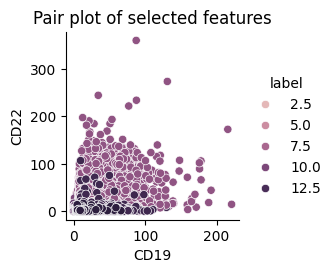

In [ ]:
#pairplot
sns.pairplot(data, hue='label',x_vars=['CD19'],y_vars=['CD22'])
plt.title('Pair plot of selected features')
plt.show()

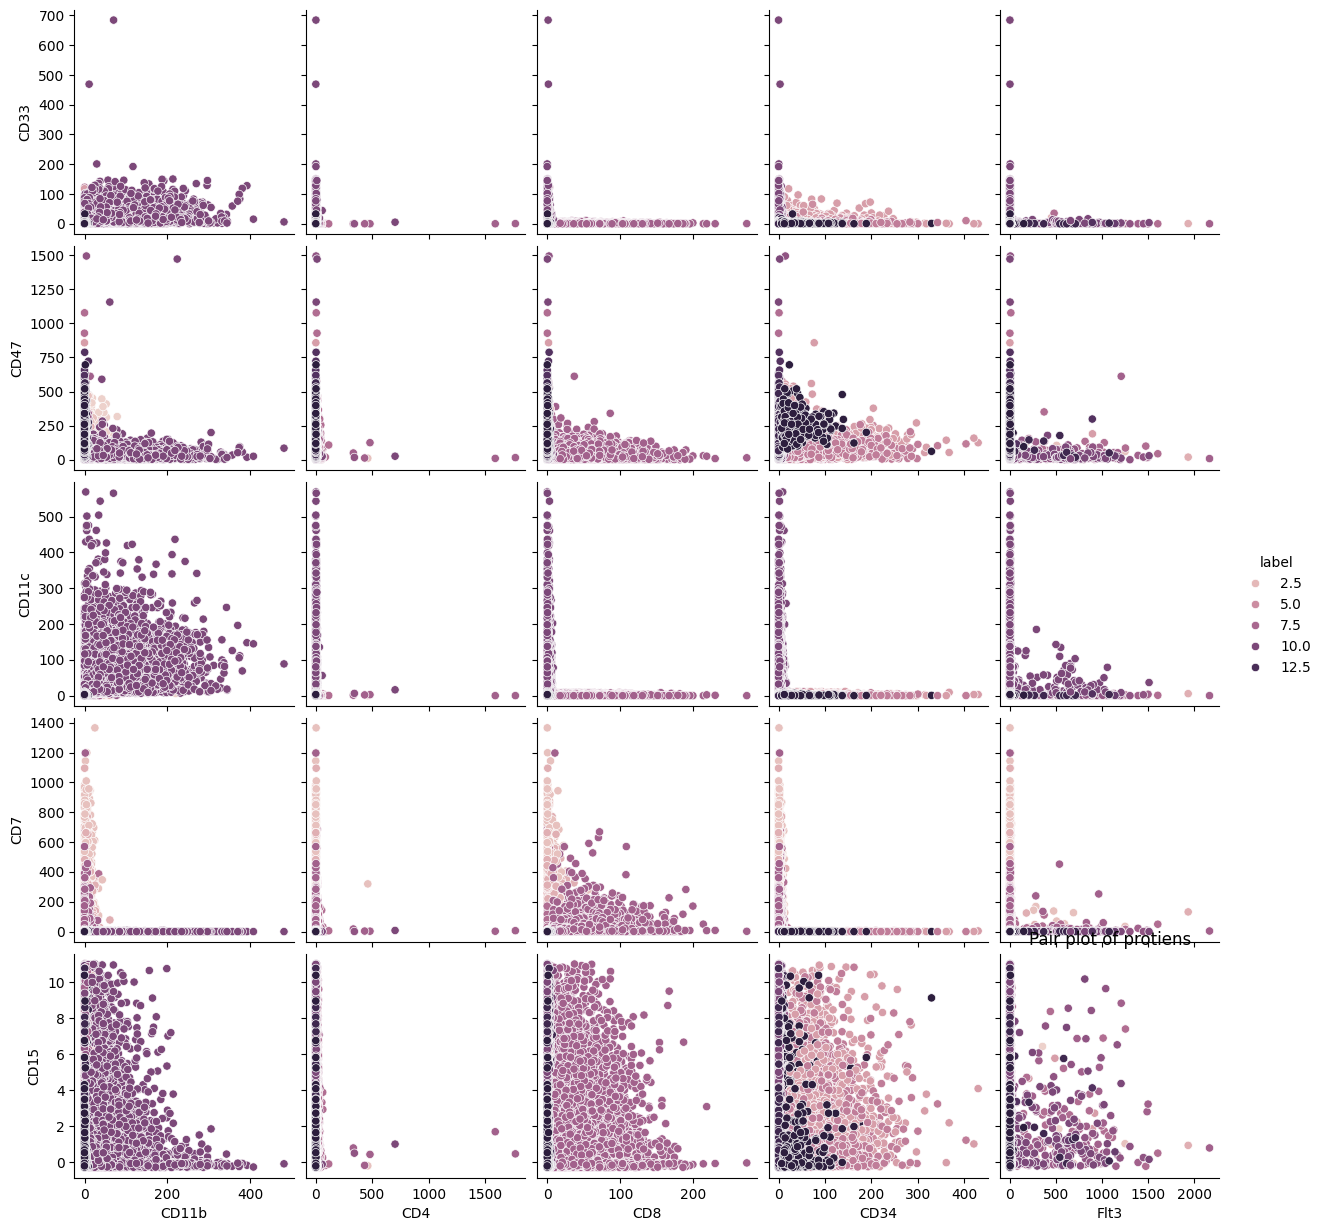

In [ ]:
sns.pairplot(data, hue='label', x_vars=['CD11b', 'CD4', 'CD8', 'CD34', 'Flt3'], y_vars=['CD33', 'CD47', 'CD11c', 'CD7', 'CD15'])
plt.title('Pair plot of protiens')
plt.show()

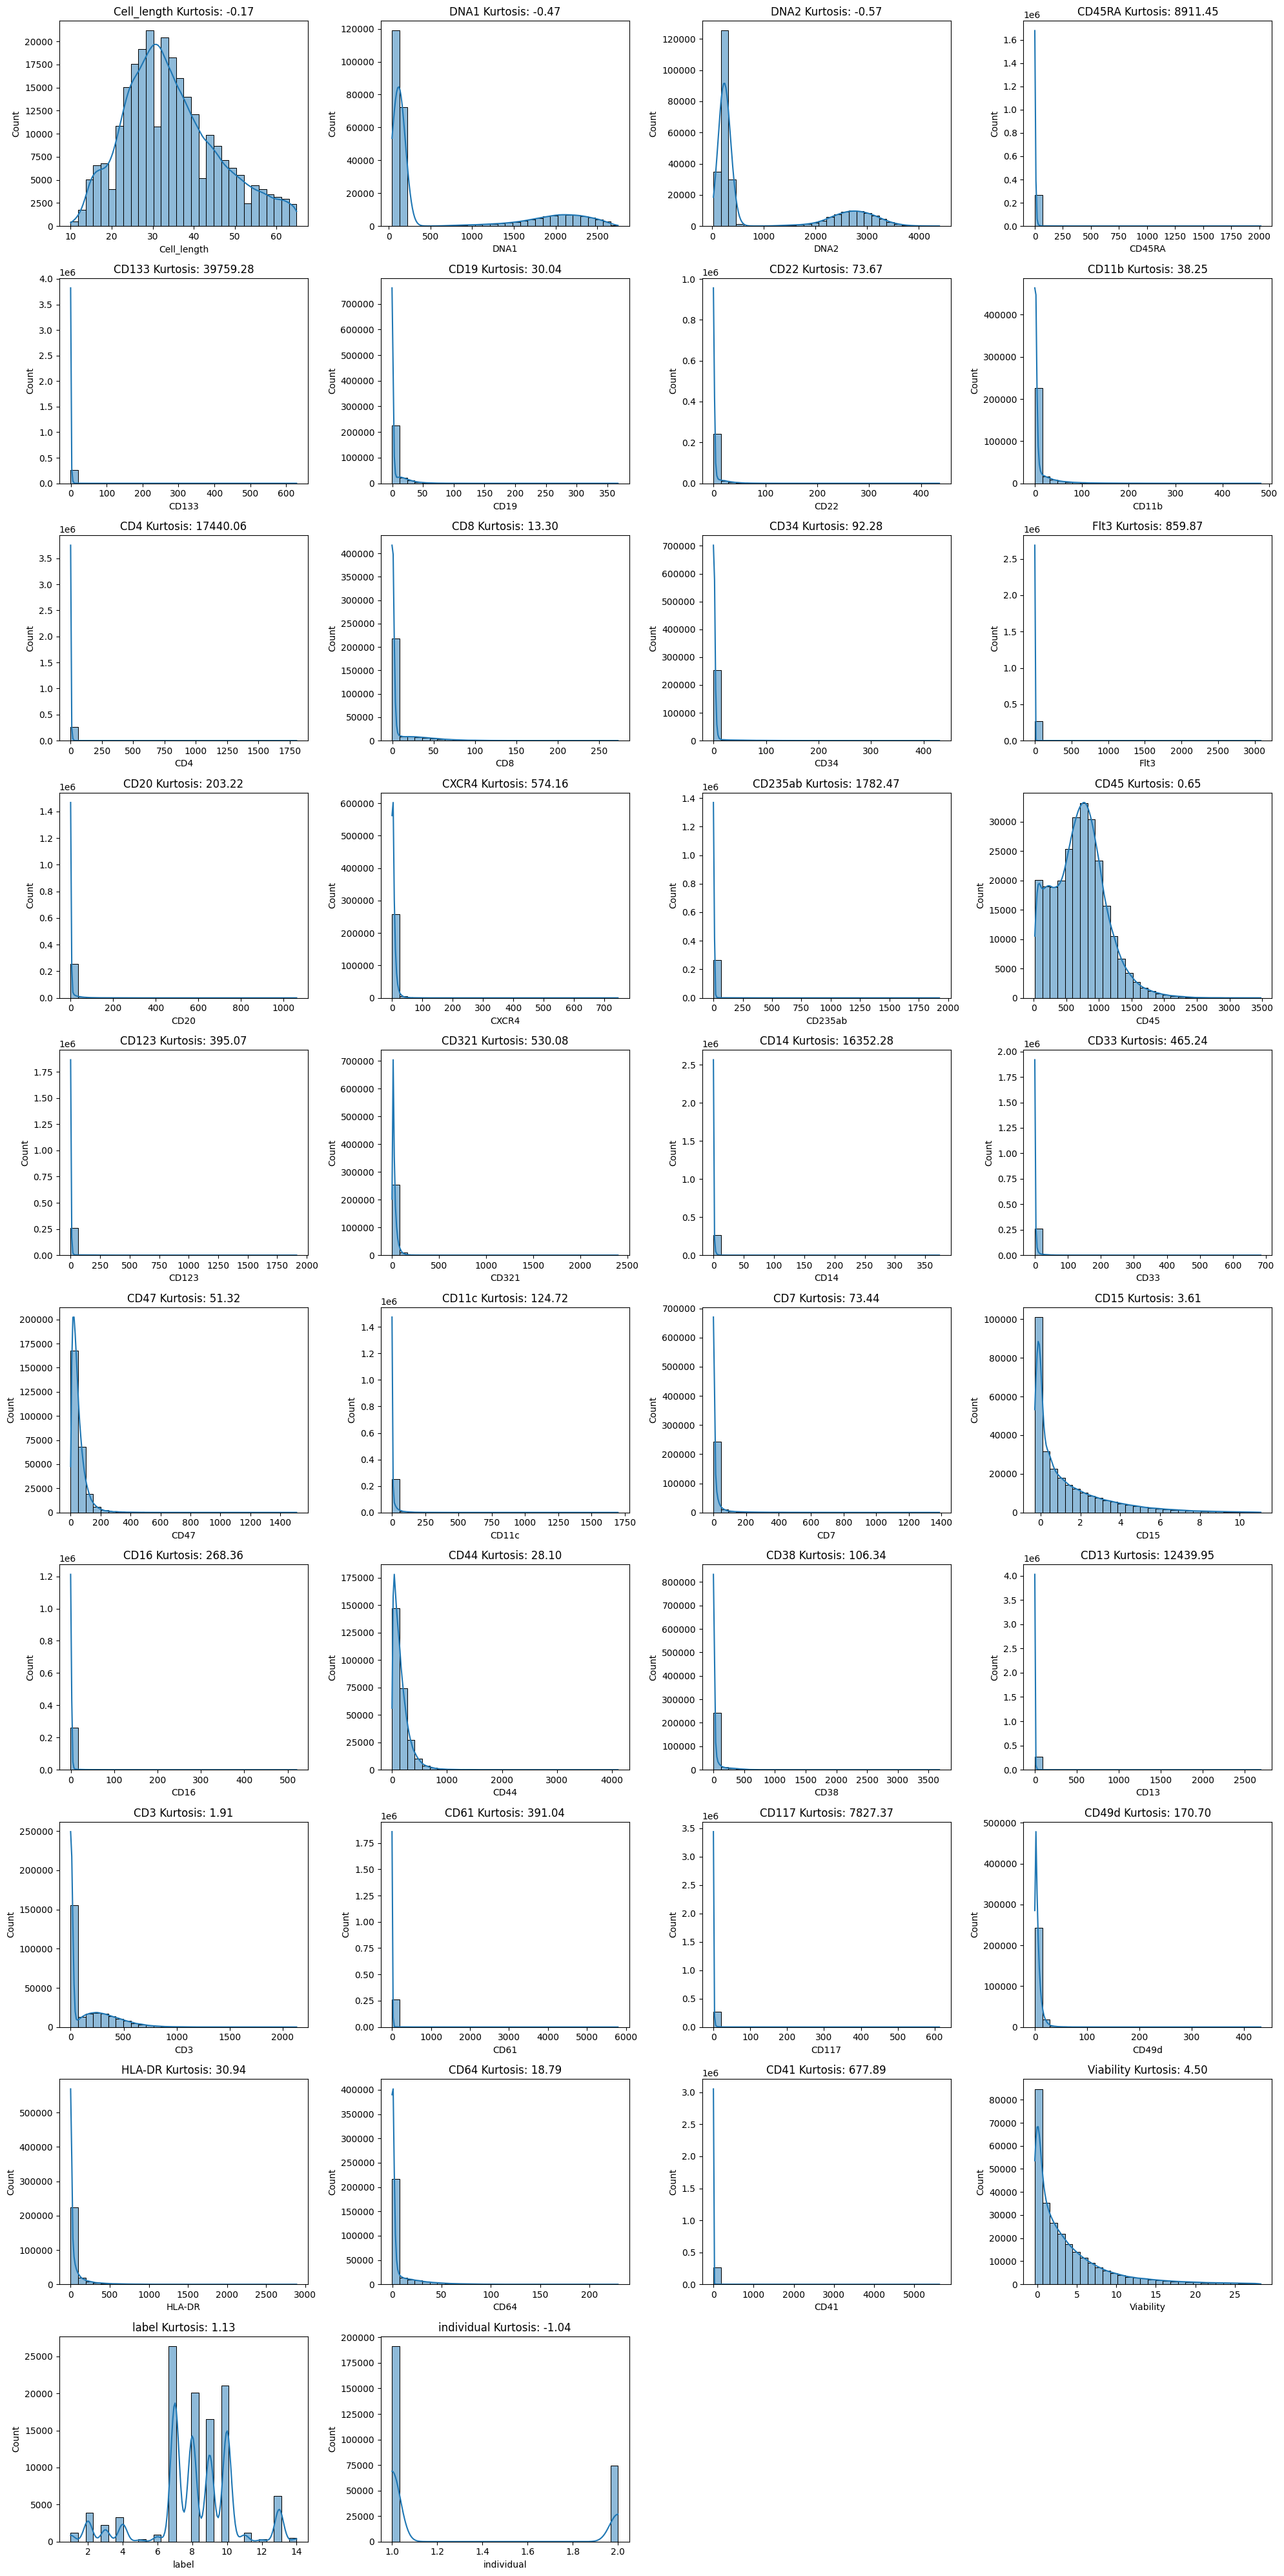

In [ ]:
from scipy.stats import kurtosis
# Define the columns to exclude
excluded_columns = ['Event', 'event_time', 'file_number', 'event_number']

# Select relevant columns
relevant_columns = [col for col in data.columns if col not in excluded_columns]

# Set the number of columns and rows for the subplot grid
num_cols = 4
num_rows = (len(relevant_columns) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 4))
axes = axes.flatten()

# Plot histograms with KDE for each relevant column
for i, col in enumerate(relevant_columns):
    sns.histplot(data[col].dropna(), kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'{col} Kurtosis: {kurtosis(data[col].dropna()):.2f}')

# Adjust layout and remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

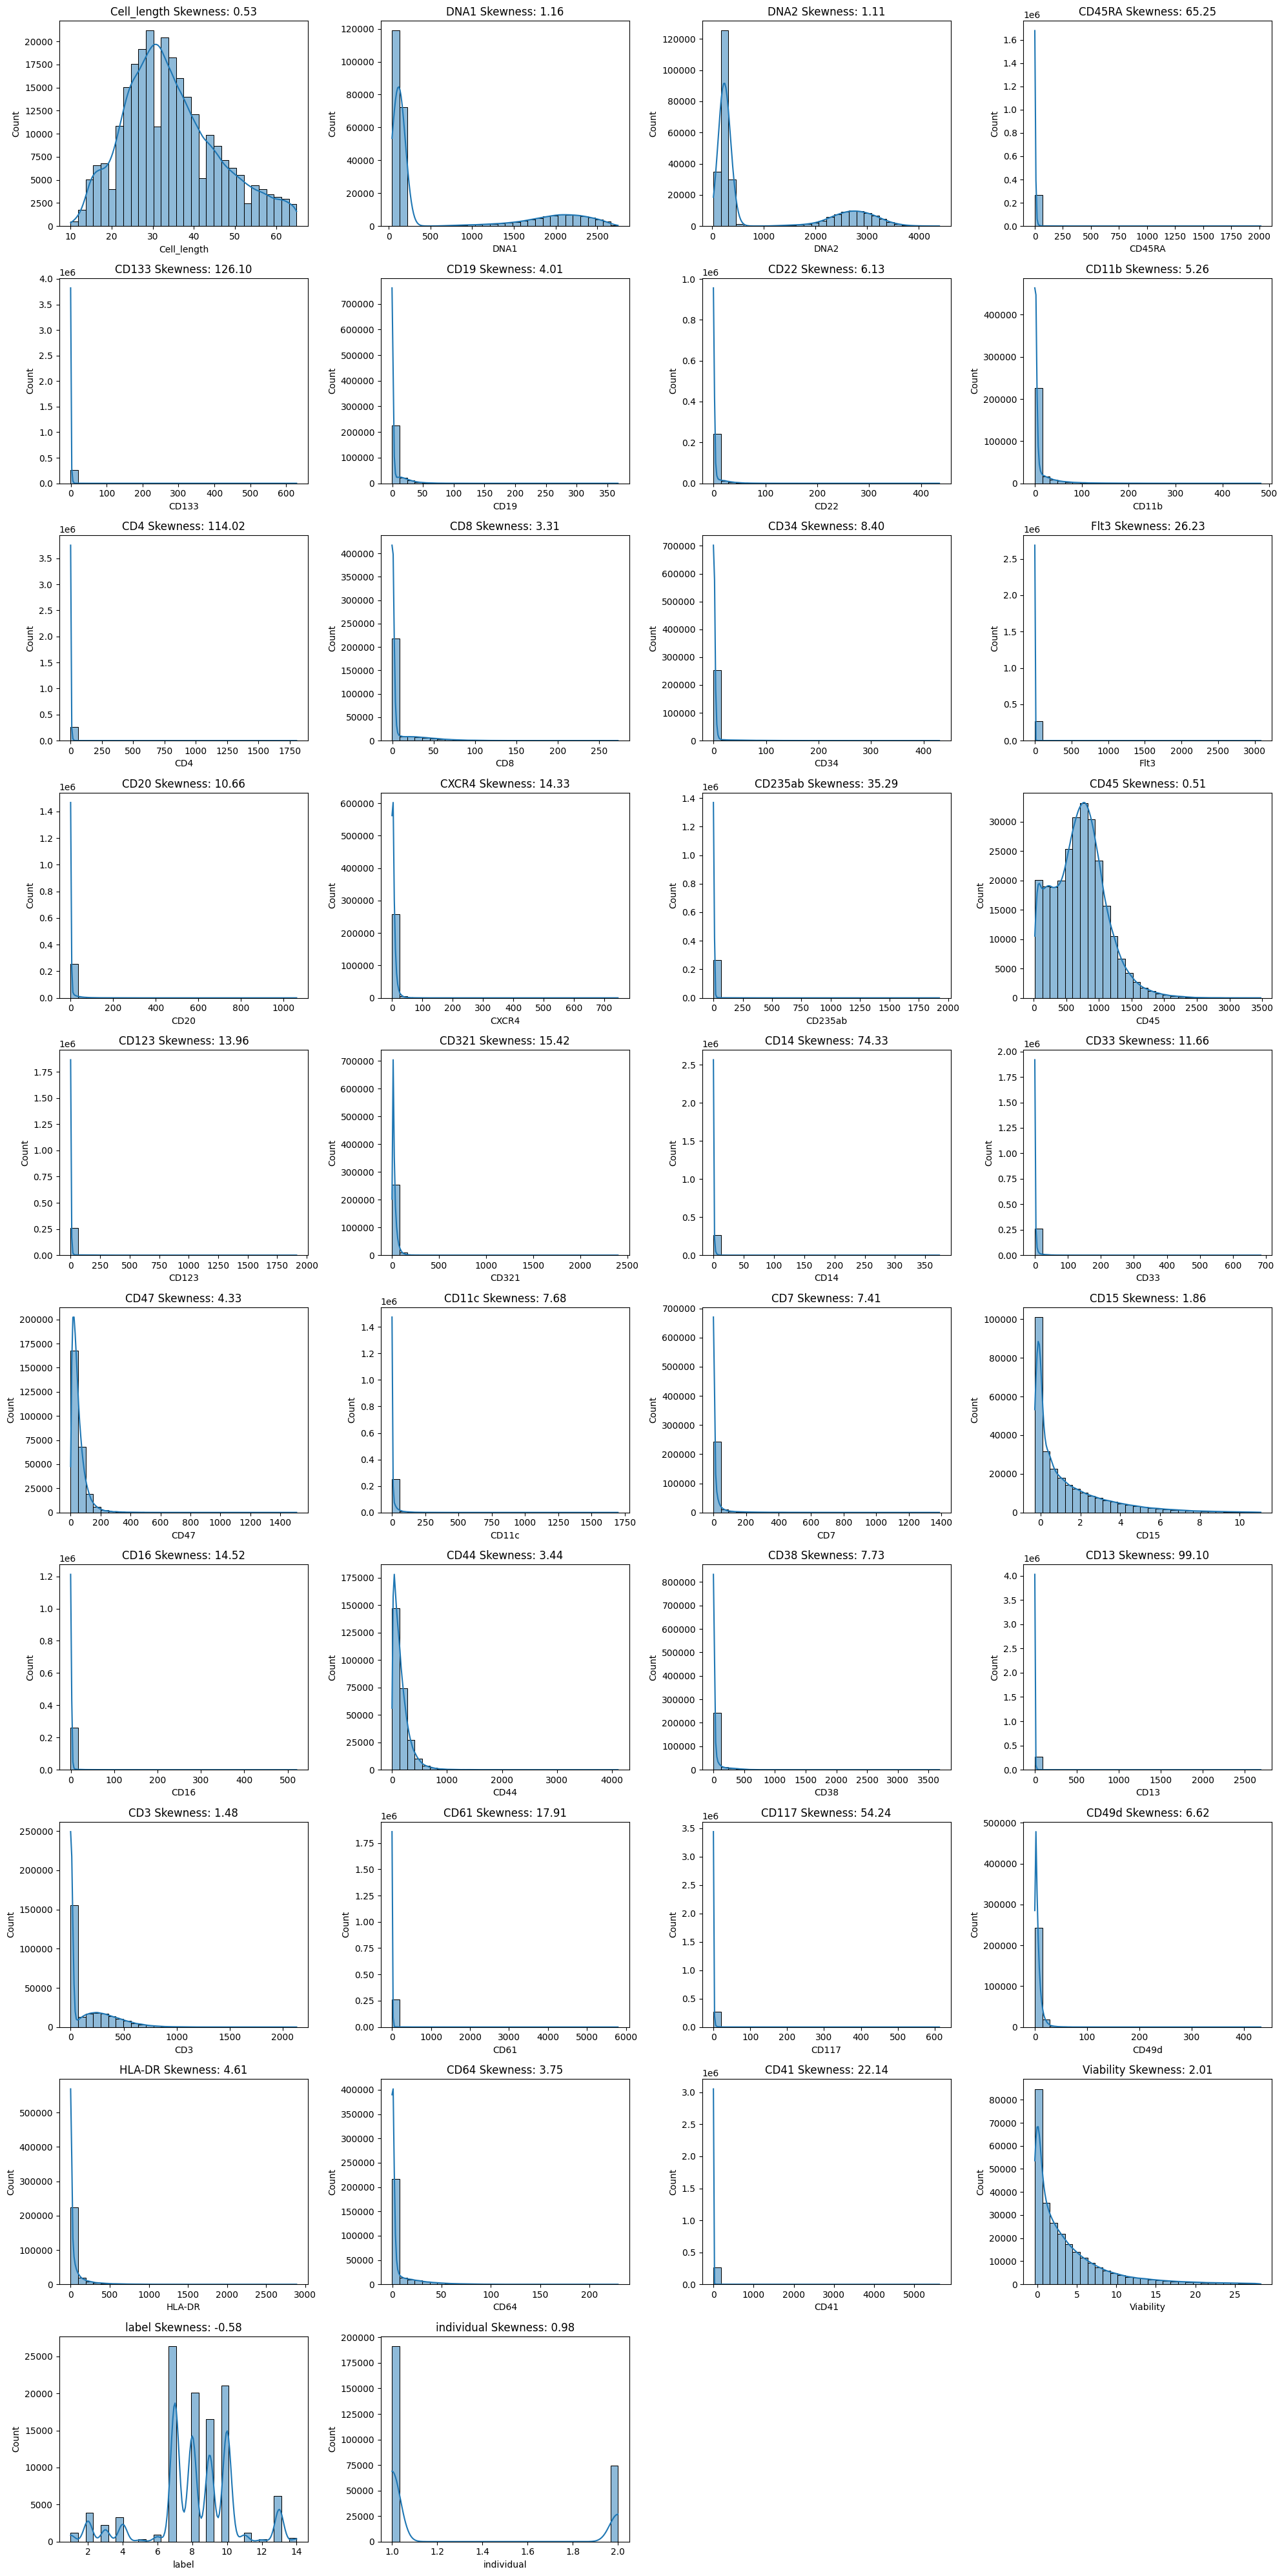

In [ ]:
from scipy.stats import skew

# Define the columns to exclude
excluded_columns = ['Event', 'event_time', 'file_number', 'event_number']

# Select relevant columns
relevant_columns = [col for col in data.columns if col not in excluded_columns]

# Set the number of columns and rows for the subplot grid
num_cols = 4
num_rows = (len(relevant_columns) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 4))
axes = axes.flatten()

# Plot histograms with KDE for each relevant column
for i, col in enumerate(relevant_columns):
    sns.histplot(data[col].dropna(), kde=True, ax=axes[i], bins=30)
    # Calculate skewness
    column_skewness = skew(data[col].dropna())
    axes[i].set_title(f'{col} Skewness: {column_skewness:.2f}')

# Adjust layout and remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

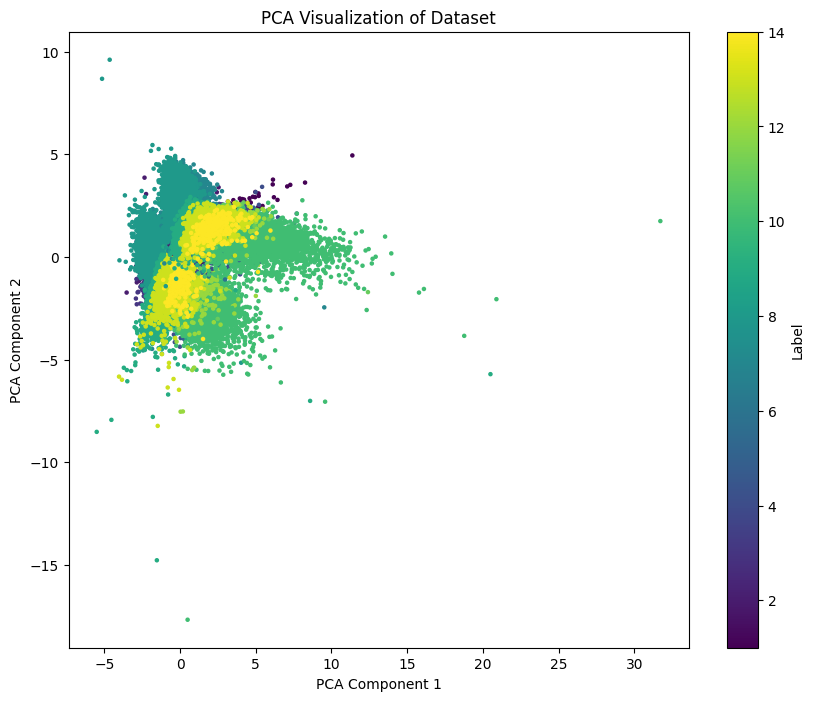

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

excluded_columns = ['Event', 'Time', 'Cell_length', 'file_number', 'event_number', 'label', 'individual']

# Filter out only the columns that exist in the DataFrame
existing_excluded_columns = [col for col in excluded_columns if col in data.columns]

# Exclude the specified columns
df_filtered = data.drop(existing_excluded_columns, axis=1)

# Standardize the data (Z-score normalization)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_filtered)

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pca_results = pca.fit_transform(scaled_data)

# Add the PCA results to the original data for visualization
data['PCA Component 1'] = pca_results[:, 0]
data['PCA Component 2'] = pca_results[:, 1]

# Plot the PCA results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(data['PCA Component 1'], data['PCA Component 2'], c=data['label'], cmap='viridis', s=5)
plt.colorbar(scatter, label='Label')
plt.title('PCA Visualization of Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


Standard Deviations of PCA Components: [2.05032064 1.978851   1.62466973 1.54900803]
Proportion of Variance: [0.11361619 0.10583342 0.07133897 0.0648491 ]
Cumulative Proportion of Variance: [0.11361619 0.21944961 0.29078857 0.35563768]


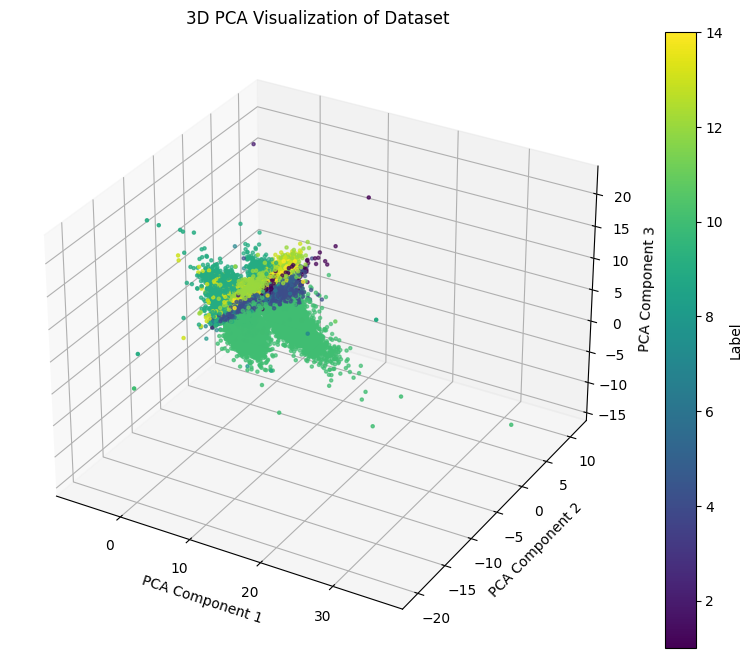

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

excluded_columns = ['Event', 'Time', 'Cell_length', 'file_number', 'event_number', 'label', 'individual']

# Filter out only the columns that exist in the DataFrame
existing_excluded_columns = [col for col in excluded_columns if col in data.columns]

# Exclude the specified columns
df_filtered = data.drop(existing_excluded_columns, axis=1)

# Handle missing data (optional)
df_filtered = df_filtered.dropna()  # Or use imputation

# Standardize the data (Z-score normalization)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_filtered)

# Perform PCA
pca = PCA(n_components=4)  # Reduce to 4 dimensions
pca_results = pca.fit_transform(scaled_data)

# Add the PCA results to the original data for visualization
data['PCA Component 1'] = pca_results[:, 0]
data['PCA Component 2'] = pca_results[:, 1]
data['PCA Component 3'] = pca_results[:, 2]
data['PCA Component 4'] = pca_results[:, 3]  # Add the 4th component

# Calculate standard deviation of each principal component
std_devs = np.sqrt(pca.explained_variance_)

# Calculate proportion of variance and cumulative proportion
proportion_variance = pca.explained_variance_ratio_
cumulative_proportion = np.cumsum(proportion_variance)

# Print results for all 4 components
print("Standard Deviations of PCA Components:", std_devs)
print("Proportion of Variance:", proportion_variance)
print("Cumulative Proportion of Variance:", cumulative_proportion)

# 3D Plot the PCA results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data['PCA Component 1'], data['PCA Component 2'], data['PCA Component 3'],
                     c=data['label'], cmap='viridis', s=5)
plt.colorbar(scatter, label='Label')
ax.set_title('3D PCA Visualization of Dataset')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.show()

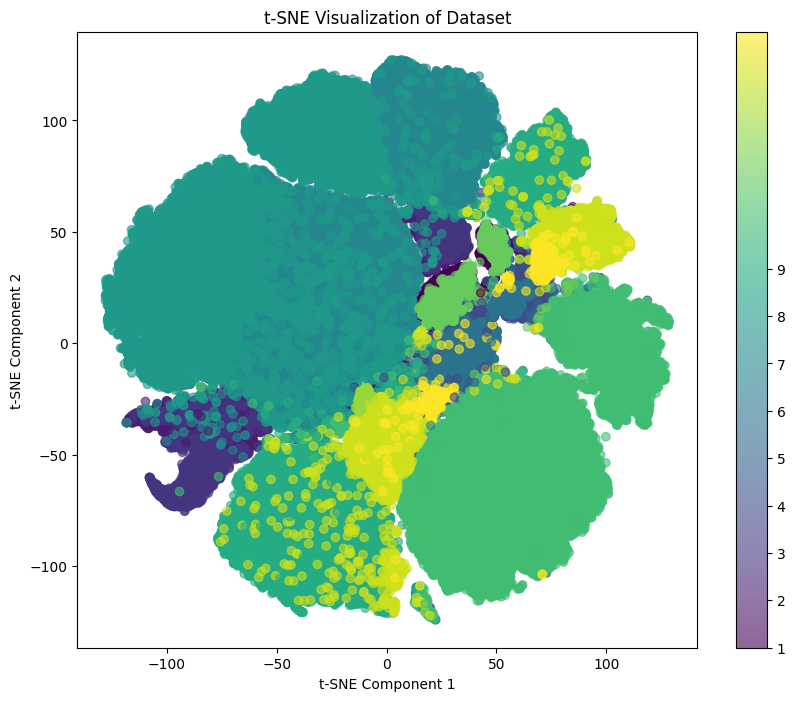

In [ ]:
from sklearn.manifold import TSNE

#apply t-sne
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(scaled_data)
#adding t-sne results to the original dataframe
data['TSNE1'] = tsne_results[:, 0]
data['TSNE2'] = tsne_results[:, 1]
#plotting the t-sne results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(data['TSNE1'], data['TSNE2'], c=data['label'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, ticks=range(10))
plt.title('t-SNE Visualization of Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()